# Practical 02 Exercises

Let's set the variable, *running_locally*, again according to your setup. If you are running the notebook on your local machine, set *running_locally* to **True**. If you are running the notebook on colab, set *running_locally* to **False**. Note: Only the full trajectories will be displayed for Exercise 2 and 3

In [ ]:
running_locally = True

In [ ]:
import sys
import os
if running_locally:
  %matplotlib notebook
  from os import listdir
  from os.path import isfile, join
  sys.path.append('Practical2_Support')
  onlyfiles = [f for f in listdir('Practical2_Support') if isfile(join('Practical2_Support', f))]
  print(onlyfiles)

else:
  %matplotlib inline
  !pip install jupyter-ui-poll
  from jupyter_ui_poll import ui_events
  from google.colab import drive
  drive.mount('/content/gdrive',force_remount=True)
  sys.path.append('/content/gdrive/MyDrive/ECE4078_Practical/Week02/Practical2_Support')
  !ls '/content/gdrive/MyDrive/ECE4078_Practical/Week02/Practical2_Support'

In [ ]:
#Import all the necessary modules
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
# widgest allows interactive elements 
import ipywidgets as widgets
import pickle

# Visualizer
from Renderer import *

# Coding exercises

# Exercise 1 (2pts): Determine the Location of the Rear Wheel 
    
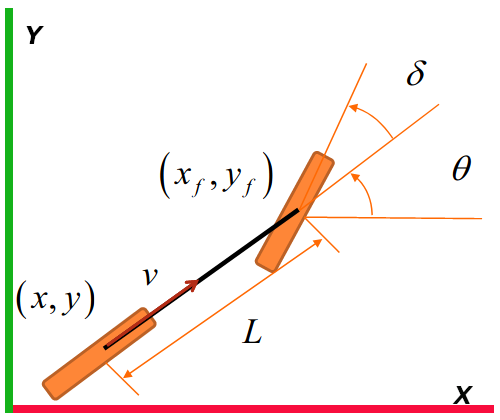

Given the known 2D location of the centre of the front wheel of the bicycle ($x_f$, $y_f$), determine the location of the centre of the rear wheel ($x, y$) in the world frame. 

**Input**:
- 1D array of shape 2x1 with the location of the front wheel (front_wheel_loc)
- Orientation of the bicycle in radians (theta)
- Bicycle length (length)

**Output**:
- 1D array of shape 2x1 with the location of the rear wheel in the world frame (values should not be rounded)

In [ ]:
def get_rear_wheel_location(front_wheel_loc=np.zeros(2), theta=0, length=0):
    rear_wheel_loc = np.zeros(2)
    
    #----------------- Add your code here ----------------------
        
    #-----------------------------------------------------------
    
    return rear_wheel_loc


**Test your code**

We have included a plot function ``display_bycicle_wheels`` to help you verify your answers. The function will display two frames, one to represent the rear wheel (red) and another to represent the front wheel (blue). Similarly, the function assumes that the steering angle $\delta$ is set to zero. Here is an example of how to use it:

In [ ]:
from TestingRenderer import display_bicycle_wheels

front_wheel = np.ones(2)*2
theta_angle = np.pi/3
rear_wheel = get_rear_wheel_location(front_wheel_loc=front_wheel, theta=theta_angle, length=1)

display_bicycle_wheels(rear_wheel, front_wheel, theta=theta_angle)

As visual test cases, we recommend to consider:

- Where should be the front wheel if $\theta=0$?
- Where should be the front wheel if $\theta=\frac{\pi}{2}$?

### Exercise 2 (3pts): Extend Bicycle Model to Consider Acceleration and Steering Angle Rate
    
In the example of the bicycle model, the bicycle took as input velocity $v$ and steering angle $\delta$.

We now want to modify our model so that it receives acceleration $a$ and steering rate $\varphi$ as control inputs instead. With this new control input, the bicycle state is now defined by its 2D position $(x,y)$,  orientation ($\theta$) and steering angle ($\delta$).

You are tasked with computing the bicycle state for a total of $max\_T$ iterations using this new control input

**Input**:
- 1D array with the current bicycle state $[x, y, \theta, \delta]$
- Bicycle length (length)
- Maximum number of iterations (max_t)
- Initial velocity (Vi)
- Accleration (a)
- Steering_rate (phi)


**Output**:
- Array of bicycle states of lenght max_t. Column order must be $[x, y, \theta, \delta]$ (values should not be rounded)

In [ ]:
def get_bicycle_trajectory(initial_state = np.array([1, 1, 0, 0]), length=1, max_t=100, v_i=0, a=0, phi=0):
    
    dt = 0.1
    states = np.zeros((max_t+1, initial_state.shape[0]))
    states[0,:] = initial_state
    
    
    #----------------- Add your code here ----------------------
    
    #------------------------------------------------------------
        
    return states

**Test your code**

We have included a rendering class to help you verify your answers. Here is an example of how to use it:


In [ ]:
# Input parameters
initial_state=np.array([0, 0, np.pi/2, 0.1])
length=1
max_t=50
v_i=5
a=0
phi=0.2

trj = get_bicycle_trajectory(initial_state, length, max_t, v_i, a, phi)

if running_locally:
    from TestingRenderer import TestingRenderer
    testRenderer = TestingRenderer.Instance()
    testRenderer.initialize(trj, dt_data=0.1)
else:
    from TestingRenderer import display_trajectory
    display_trajectory(trj)

As visual test cases, we recommend you to keep in mind that:

- The bicycle should move in a straight line if $\delta=0$, and $\varphi=0$
- The bicycle should move in a circular trajectory if $v$ or $a \ne 0$, $\delta \ne 0$, and $\varphi=0$
- The bicycle should move in a spiral trajectory if $v$ or $a \ne 0$, and $\varphi\ne0$

### Exercise 3 (2pts): Differential Drive Kinematic Model

Let us consider a two-wheeled vehicle that has the rotation rate of the wheels as control inputs. 

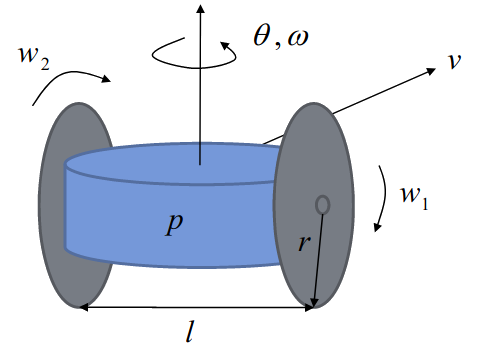

Given the kinematic constraints that relate the wheel rotation rates to the linear and angular velocity of the PenguiPi robot: 

$$
\begin{align}
v=\frac{rw_1 + rw_2}{2} \\
\omega=\frac{rw_1 - rw_2}{l},
\end{align}
$$

compute the state, i.e., $[x, y, \theta]$ of the PenguiPi robot for a total of $𝑚𝑎𝑥\_𝑇$ iterations using this new control input.

**Input**:
- 1D array with the current robot state $[x, y, \theta]$
- Wheels width (length, l)
- Wheels radius (wheel_radius, r)
- Maximum number of iterations (max_t)
- Rotation rate of the right wheel (right_rate)
- Rotation rate of the left wheel (left_rate)

**Output**:
- Array of robot states of lenght max_t. Column order must be $[x, y, \theta]$ (values should not be rounded)

In [ ]:
def get_penguipi_trajectory(initial_state = np.array([1, 1, 0]), length=1, wheel_radius=0.1,
                            right_rate=0, left_rate=0, max_t=100):
    
    dt = 0.1
    states = np.zeros((max_t+1, initial_state.shape[0]))
    states[0, :] = initial_state
    
    #----------------- Add your code here ----------------------
    
        
    #-----------------------------------------------------------
        
    return states

**Test your code**

We have included a rendering class to help you verify your answers. Here is an example of how to use it:


In [ ]:
# Input parameters
initial_state=np.array([0, 0, np.pi/6])
length=1
wheel_radius=0.2
right_rate=10
left_rate=5
max_t=100

trj = get_penguipi_trajectory(initial_state, length, wheel_radius, right_rate, left_rate, max_t)

if running_locally:
    from TestingRenderer import TestingRenderer
    testRenderer = TestingRenderer.Instance()
    testRenderer.initialize(trj, dt_data=0.05)
else:
    from TestingRenderer import display_trajectory
    display_trajectory(trj)

As visual test cases, we recommend you to keep in mind that:

- The PenguiPi robot should move in a straight line if $w_1=w_2$
- The PenguiPi robot should turn to the left if $w_1>w_2$ (the right wheel moves faster than the left wheel)
- The PenguiPi robot should turn to the right if $w_1<w_2$ (the left wheel moves faster than the right wheel)